Assignment No. 02

Title of the Assignment: Classification using Deep Neural Networ
k
Objectiv
e:
Implement binary classification using a Deep Neural Network (DNN).
Use the IMDB movie reviews dataset to classify text reviews as positive or negative.
Understand the basics of Natural Language Processing (NLP) and how DNNs can be applied to textual data.

In [3]:
# Step 1: Ignore Warnings and Import Libraries
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
# Step 2: Load IMDB Dataset
# Only keep the top 10,000 most frequent words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training samples: 25000, Test samples: 25000


In [7]:
# Step 3: Preprocess Data - Pad Sequences
max_length = 200
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')
print(f"Padded x_train shape: {x_train_padded.shape}")

Padded x_train shape: (25000, 200)


In [9]:
# Step 4: Build the Deep Neural Network Model
model = Sequential([
Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
GlobalAveragePooling1D(),
Dense(64, activation='relu'),
Dense(1, activation='sigmoid') # Sigmoid for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 5: Train the Model
history = model.fit(
x_train_padded, y_train,
epochs=10,
batch_size=32,
validation_split=0.2,
verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6436 - loss: 0.6184 - val_accuracy: 0.8544 - val_loss: 0.3511
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8727 - loss: 0.3037 - val_accuracy: 0.8684 - val_loss: 0.3140
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9119 - loss: 0.2277 - val_accuracy: 0.8532 - val_loss: 0.3552
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9215 - loss: 0.2059 - val_accuracy: 0.8726 - val_loss: 0.3238
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9333 - loss: 0.1781 - val_accuracy: 0.8680 - val_loss: 0.3466
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9489 - loss: 0.1467 - val_accuracy: 0.8716 - val_loss: 0.3490
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9570 - loss: 0.1271 - val_accuracy: 0.8714 - val_loss: 0.3697
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9613 - loss: 0.1195 - val_accuracy: 0.

In [13]:
# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8322 - loss: 0.5581

Test Accuracy: 0.8309


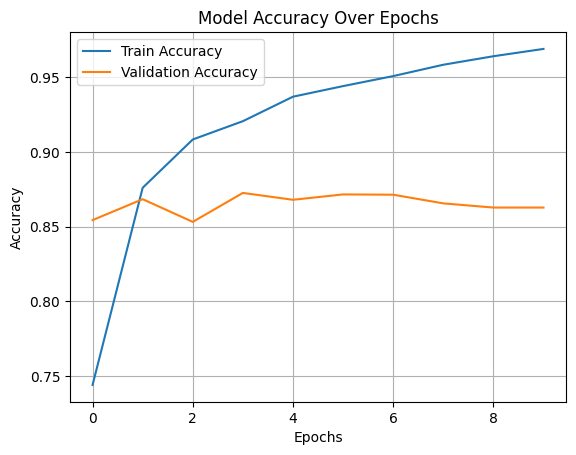

In [15]:
# Step 7: Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Step 8: Predict on Sample Review
# Load the word index from Keras's IMDb dataset
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

sample_review = x_test[0]
print("Review Text:\n", decode_review(sample_review))
print("Actual Sentiment:", "Positive" if y_test[0] == 1 else "Negative")

# Predict Sentiment
sample_review_padded = pad_sequences([sample_review], maxlen=max_length, padding='post', truncating='post')
prediction = model.predict(sample_review_padded)[0][0]
print(f"Predicted Sentiment Score: {prediction:.4f}")
print("Predicted Sentiment:", "Positive" if prediction >= 0.5 else "Negative")


Review Text:
 ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Actual Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Sentiment Score: 0.0190
Predicted Sentiment: Negative


In [23]:
# Step 6.1: Display Accuracy as Percentage
print(f"Model Test Accuracy: {accuracy * 100:.2f}%")

Model Test Accuracy: 83.09%


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.87      0.84     12500
    Positive       0.86      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



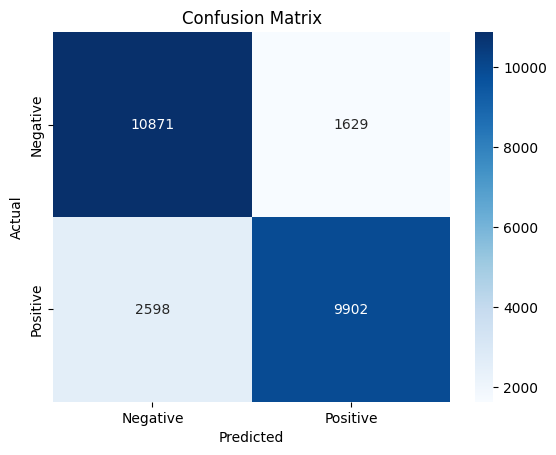

In [25]:
# Optional: Detailed Accuracy Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Predict on test set
y_pred_probs = model.predict(x_test_padded)
y_pred = (y_pred_probs >= 0.5).astype(int).reshape(-1)
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()